# House Price Prediction Project

### https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## EDA (Exploratory Data Analysis)

In [2886]:
# Load the libraries
import pandas as pd
import numpy as np
# Get plots directly without the call of plt.show()
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew, boxcox_normmax
from scipy.special import boxcox1p

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline

from mlxtend.regressor import StackingCVRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Set display options if not done yet
# pd.set_option('display.max_columns', 100)

In [2887]:
# Load the train and test datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2888]:
# Quickly look at the first five rows of the train dataset
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2889]:
# Quickly look at the first five rows of the test dataset
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [2890]:
# Check the number of samples and features
print("The size of the train dataset before dropping ID is : {}".format(train.shape))
print("The size of the test dataset before dropping ID is: {}".format(test.shape))

# Save both IDs before dropping
train_ID = train['Id']
test_ID = test['Id']

# Drop both IDs now since they are unnecessary for the prediction
train.drop(['Id'], axis = 1, inplace = True)
test.drop(['Id'], axis = 1, inplace = True)

# Double check the sample and features after ID dropping
print("\nThe size of the train dataset after dropping ID is : {}".format(train.shape))
print("The size of the test dataset after dropping ID is : {}".format(test.shape))

The size of the train dataset before dropping ID is : (1460, 81)
The size of the test dataset before dropping ID is: (1459, 80)

The size of the train dataset after dropping ID is : (1460, 80)
The size of the test dataset after dropping ID is : (1459, 79)


**Explore important variables**

mu = 180921.20 and sigma = 79415.29



/Users/jieliu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'SalePrice Distribution')

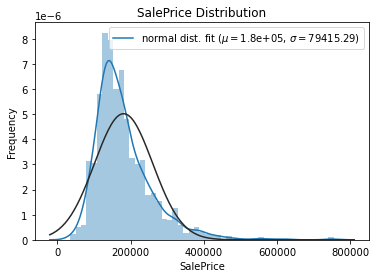

In [2891]:
# Examine the target variable -- 'SalePrice'
sns.distplot(train['SalePrice'], fit = norm)

# Get the fitted paramates used by sns
(mu, sigma) = norm.fit(train['SalePrice'])
print("mu = {:.2f} and sigma = {:.2f}\n".format(mu, sigma))

# Plot the distribution
plt.legend(["normal dist. fit ($\mu = ${0:.2g}, $\sigma = ${1:.2f})".format(mu, sigma)])
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

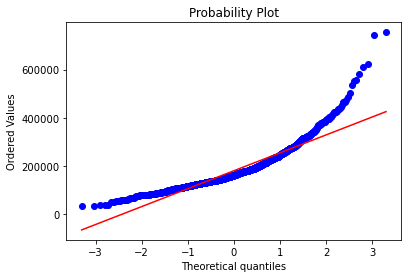

In [2892]:
# Check the QQ-plot
stats.probplot(train['SalePrice'], plot = plt)
# Overwrite the value display from QQ-plot (not display the values)
plt.show()

In [2893]:
# Check the statistical summary of the target variable -- 'SalePrice'
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [2894]:
# Examine the most important numeric predictors (move to categorical predictors later)
num_cols = train.select_dtypes('number').columns
print("There are {} numeric variables.".format(len(num_cols)))

There are 37 numeric variables.


<AxesSubplot:>

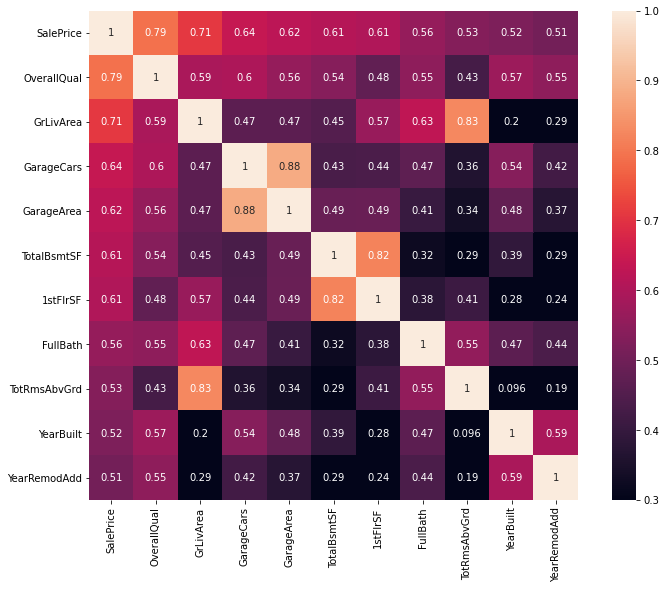

In [2895]:
# Correlation matrix for the above 37 numeric variables
corrmat = train[num_cols].corr()
# Sort correlations with 'SalePrice' in descending orders (most important -> least important correlations)
corrmat_sorted = corrmat.sort_values(by = ['SalePrice'], ascending = False)
# Select only high correlations with values > 0.5 (pick those columns)
high_corr_cols = corrmat_sorted[corrmat_sorted['SalePrice'] > 0.5].index

# Rebuild the correlation matrix for these high correlations with 'SalePrice'
corrmat_high = train[high_corr_cols].corr()

plt.subplots(figsize = (12, 9))
# vmin = 0.3 is used for a clearer visualisation of the correlation matrix
sns.heatmap(corrmat_high, vmin = 0.3, annot = True, square = True)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

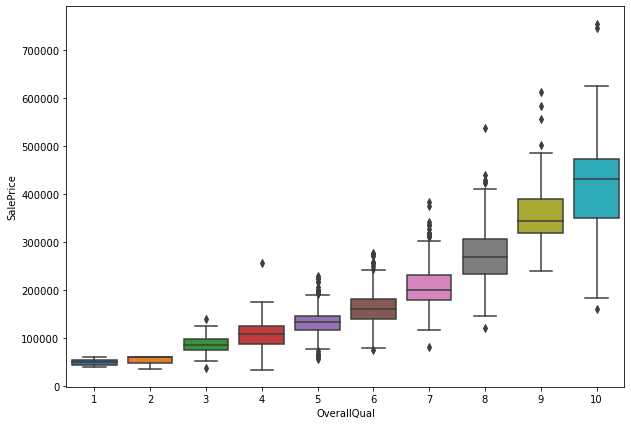

In [2896]:
# Now look at the variable 'OverallQual' closely as it has the highest correlation with 'SalePrice'
qual_price = pd.concat([train['SalePrice'], train['OverallQual']], axis = 1)
plt.subplots(figsize = (10, 7))
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = qual_price)

In [2897]:
# Should we deal with any potential outliers?

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

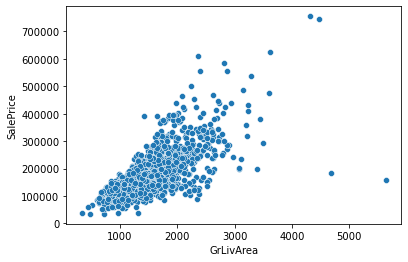

In [2898]:
# Now look at the variable 'GrLivArea' as it has the second highest correlation with 'SalePrice'
area_price = pd.concat([train['GrLivArea'], train['SalePrice']], axis = 1)
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = area_price)

In [2899]:
# Again, should we deal with any potential outliers?
# These 2 houses (with id = 523 & 1298) are the potential outliers
# Big houses (large 'GrLivArea') but low 'SalePrice'
train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


## Data Cleaning & Data Preparation (partially)
### Data Preparation is only partically done for the ordinal variables with missing values.
### The rest ordinal variables will be processed in the next dedicated 'Data Preparation' section to finish all remaining encodings.

In [2900]:
from sklearn.preprocessing import OrdinalEncoder

In [2901]:
# Before checking the completeness of the train and test datasets, combine/concatenate them first
# Reset the index after concatenation and drop the old index
combined_data = pd.concat((train, test)).reset_index(drop = True)
# Keep the target variable
y_train = train.SalePrice.values
# Drop the 'SalePrice' column after concatenation (do not need it during data cleaning)
combined_data.drop(['SalePrice'], axis = 1, inplace = True)
print("The size of the combined dataset without 'SalePrice' is {}".format(combined_data.shape))

The size of the combined dataset without 'SalePrice' is (2919, 79)


In [2902]:
# Now check the completeness of the combined dataset for null values
all_cols = combined_data.isnull().sum()
# Select columns containing null values
missing_cols = all_cols[all_cols > 0]
missing_cols_sorted = missing_cols.sort_values(ascending = False)

missing_ratio = missing_cols_sorted / len(combined_data) * 100
missing_data = pd.DataFrame({
    'NA Count': missing_cols_sorted,
    'Ratio (%)': missing_ratio
})

print("There are {} columns with missing values:".format(len(missing_cols_sorted)))
print(missing_data)

There are 34 columns with missing values:
              NA Count  Ratio (%)
PoolQC            2909  99.657417
MiscFeature       2814  96.402878
Alley             2721  93.216855
Fence             2348  80.438506
FireplaceQu       1420  48.646797
LotFrontage        486  16.649538
GarageFinish       159   5.447071
GarageYrBlt        159   5.447071
GarageQual         159   5.447071
GarageCond         159   5.447071
GarageType         157   5.378554
BsmtExposure        82   2.809181
BsmtCond            82   2.809181
BsmtQual            81   2.774923
BsmtFinType2        80   2.740665
BsmtFinType1        79   2.706406
MasVnrType          24   0.822199
MasVnrArea          23   0.787941
MSZoning             4   0.137033
BsmtFullBath         2   0.068517
BsmtHalfBath         2   0.068517
Utilities            2   0.068517
Functional           2   0.068517
Exterior2nd          1   0.034258
Exterior1st          1   0.034258
SaleType             1   0.034258
BsmtFinSF1           1   0.034258
BsmtFi

### Impute missing values

There are 0 rows with 'PoolArea' != 0 & 'PoolQC' is null:
Series([], Name: PoolArea, dtype: int64)


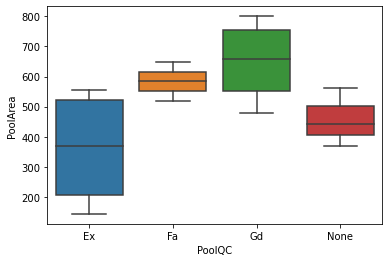

In [2903]:
# For Ordinal variables, O is used as the abbreviation
# For Nominal variables, N is used as the abbreviation
# For instance, PoolQC - O means the variable 'PoolQC' is identified as an ordinal variable
# The purpose of categorising categorical variables is for appropriate encoding
# e.g for ordinal variables, use OrdinalEncoder & it is done right after impute selected variables (in this section)
#     for nominal variables, use OneHotEncoder/get_dummies(preferred because of simplicity)
#      & this will be done later on in the 'Data Preparation' section with a one-line code to deal with all

##### Pool Group: 1 varaible #####
# PoolQC            2909  99.657417
# PoolArea is also related (no missing values)

# [PoolQC - O] --- NA -> No pool --- BE CAREFUL!
# NA should not be dropped here as it makes sense that majority houses do not have a pool
combined_data['PoolQC'] = combined_data['PoolQC'].fillna('None')

# Look at all pool related variables: 'PoolQC' & 'PoolArea' (No missing values in PoolArea)
# In particular, check the specific situation where 'PoolArea' is not 0 & 'PoolQC' is NA -> error/missing data
error_pool = combined_data[(combined_data['PoolArea'] != 0) & (combined_data['PoolQC'].isnull())]

# Find 3 such rows matching with the above situation
print("There are {} rows with 'PoolArea' != 0 & 'PoolQC' is null:".format(len(error_pool)))
print(error_pool['PoolArea'])

# Consider impute 'PoolQC' using 'PoolArea', check their relationship first
norm_pool = combined_data[(combined_data['PoolArea'] != 0) & (combined_data['PoolQC'].notnull())]
area_quality = pd.concat([norm_pool['PoolQC'], norm_pool['PoolArea']], axis = 1)
sns.boxplot(x = 'PoolQC', y = 'PoolArea', data = area_quality)

# From the boxplot, it seems like smaller pool (small PoolArea) tends to have better quality
# Based on the boxplot, the pool quality of the first two houses
# (Id = 2420 & PoolArea = 368, Id = 2503 & PoolArea = 444)
# is likely to be 'Ex'
# The pool quality of the last house
# (Id = 2599 & PoolArea = 561)
# could be any of the three qualities -- Ex, Fa, Gd
# Take the average, which is 'Fa'
combined_data.at[2420, 'PoolQC'] = 'Ex'
combined_data.at[2503, 'PoolQC'] = 'Ex'
combined_data.at[2599, 'PoolQC'] = 'Fa'

In [2904]:
# Use OrdinalEncoder to encode 'PoolQC'
# 'None' -- 0 & 'Po' -- 1 & 'Fa' -- 2 & 'TA' -- 3 & 'Gd' -- 4 & 'Ex' -- 5
# ######## THINK: 'Po' to be added in between 'None' & 'Fa' as checking qualities for other variables,
# ######## most have the pattern Ex > Gd > TA > Fa > Po > NA (sometimes no NA)
# Considering other quality related variables, they share exact or very similar structures
# Create a general OrdinalEncoder for quality related variables
oe_qual_all = OrdinalEncoder(categories = [['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']])
combined_data['PoolQC'] = oe_qual_all.fit_transform(combined_data[['PoolQC']])

In [2905]:
# [MiscFeature - N] --- NA -> No misc feature --- BE CAREFUL!
combined_data['MiscFeature'] = combined_data['MiscFeature'].fillna('None')

In [2906]:
# [Alley - N] --- NA -> No alley access -- BE CAREFUL!
combined_data['Alley'] = combined_data['Alley'].fillna('None')

<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

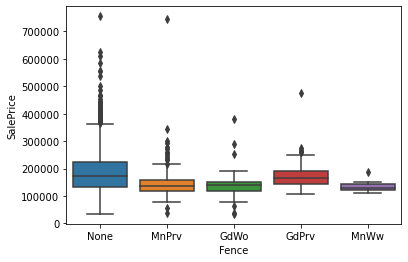

In [2907]:
# [Fence - N] --- NA -> No fence -- BE CAREFUL!
combined_data['Fence'] = combined_data['Fence'].fillna('None')

# It seems like 'Fence' is sort of ordinal: GdPrv > MnPrv & GdWo > MnWwl; however, MnPrv ? GdWo
# Check 'Fence' with 'SalePrice' to further investigate
# It shows that 'Fence' is rather a nominial variable
fence_price = pd.concat([combined_data['Fence'], train['SalePrice']], axis = 1)
sns.boxplot(x = 'Fence', y = 'SalePrice', data = fence_price)

In [2908]:
# [FireplaceQu - O] --- NA -> No fireplace -- BE CAREFUL!
combined_data['FireplaceQu'] = combined_data['FireplaceQu'].fillna('None')

In [2909]:
# Use OrdinalEncoder to encode 'FireplaceQu' by reusing the #oe_qual_all# encoder
# 'None' -- 0 & 'Po' -- 1 & 'Fa' -- 2 & 'TA' -- 3 & 'Gd' -- 4 & 'Ex' -- 5
# oe_fireplace_qual = OrdinalEncoder(categories = [['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']])
combined_data['FireplaceQu'] = oe_qual_all.fit_transform(combined_data[['FireplaceQu']])

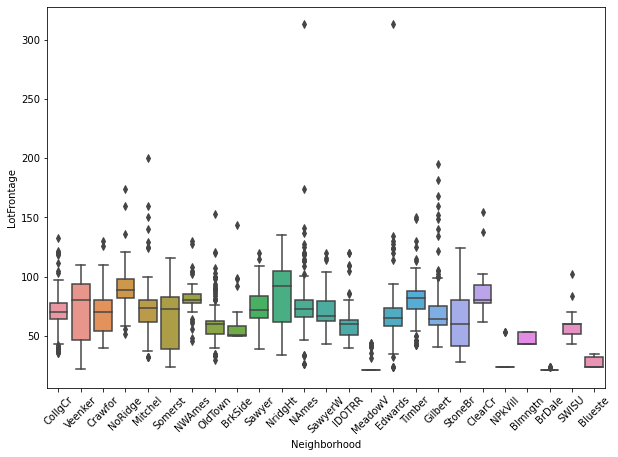

In [2910]:
##### Lot Group: 1 varaible #####
# LotFrontage        486  16.649538
# However, LotShape & LotConfig are also related, but there is no need to check both

# [LotFrontage - Numeric] --- NA -> missing value
# It is likely that the area of each street connected to the house property is similar to other houses in the
# neighborhood.
# Check 'LotFrontage' with 'Neighborhood' to further investigate
# Fill missing values with the median value of 'LotFrontage' per neighborhood
# Why median not mean? Outliars.
frontage_neighborhood = pd.concat([combined_data['LotFrontage'], combined_data['Neighborhood']], axis = 1)
plt.subplots(figsize = (10, 7))
sns.boxplot(x = 'Neighborhood', y = 'LotFrontage', data = frontage_neighborhood)
plt.xticks(rotation = 45)

combined_data['LotFrontage'] = combined_data.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

In [2911]:
##### Garage Group: 7 variables #####
# GarageFinish       159   5.447071
# GarageYrBlt        159   5.447071
# GarageQual         159   5.447071
# GarageCond         159   5.447071
# GarageType         157   5.378554
# GarageCars           1   0.034258
# GarageArea           1   0.034258

# There are inconsistency within this garage group (look at 'GarageCars' & 'GarageArea' later):
# The question is: why does GarageType have 157 missing values, where as the other four all have 159 missing values?
# First, check these 157 missing value rows to see whether they are the same or not
missing_garage_type   = combined_data[combined_data['GarageType'].isnull().values].index
missing_garage_finish = combined_data[combined_data['GarageFinish'].isnull().values].index
missing_garage_year   = combined_data[combined_data['GarageYrBlt'].isnull().values].index
missing_garage_qual   = combined_data[combined_data['GarageQual'].isnull().values].index
missing_garage_cond   = combined_data[combined_data['GarageCond'].isnull().values].index

# From the comparisons, it is confirmed that these 159 missing value rows are the same
finish_year_comp = missing_garage_finish.equals(missing_garage_year)
finish_qual_comp = missing_garage_finish.equals(missing_garage_qual)
finish_cond_comp = missing_garage_finish.equals(missing_garage_cond)
print("Garage finish and year built comparison: Same -> {}".format(finish_year_comp))
print("Garage finish and quality comparison: Same -> {}".format(finish_qual_comp))
print("Garage finish and condition comparison: Same -> {}".format(finish_cond_comp))

# Check if the 157 missing value rows are included in the 159 missing value rows
type_finish_comp = missing_garage_type.isin(missing_garage_finish).all()
print("Garage type and finish comparison: missing type included in missing finish -> {}".format(type_finish_comp))

# Now it is time to find out the 2 rows with missing GarageFinish & GarageYrBlt & GarageQual & GarageCond
combined_data[(combined_data['GarageType'].notnull()) & (combined_data['GarageFinish'].isnull())]

Garage finish and year built comparison: Same -> True
Garage finish and quality comparison: Same -> True
Garage finish and condition comparison: Same -> True
Garage type and finish comparison: missing type included in missing finish -> True


/Users/jieliu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2126,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196.0,Unf,0.0,1046.0,1242.0,GasA,Gd,Y,SBrkr,1242,742,0,1984,0.0,0.0,2,0,5,1,TA,8,Typ,0,0.0,Detchd,NaN,NaN,1.0,360.0,NaN,NaN,Y,64,0,180,0,0,0,0.0,MnPrv,Shed,1000,9,2008,WD,Normal
2576,70,RM,50.0,9060,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,0.0,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,0.0,MnPrv,None,0,3,2007,WD,Alloca


In [2912]:
# Look close and find 'GarageCars' & 'GarageArea' are both NA for the house 2576
# It seems like it is a sign of no garage for this house
# However, think about 'GarageCars' & 'GarageArea', both only have a single NA
# Think about GarageFinish & GarageYrBlt & GarageQual & GarageCond, all have 159 NAs
# What is going on here?
# Look at the other 157 rows with missing values in:
# GarageFinish & GarageYrBlt & GarageQual & GarageCond & GarageType
missing_garage = combined_data[combined_data['GarageType'].isnull()]
missing_garage[['GarageFinish', 'GarageYrBlt', 'GarageQual', 'GarageCond', 'GarageType', 'GarageCars', 'GarageArea']]

# Now it becomes clear that these 157 houses do not have garages:
# See 'GarageCars' = 0 & 'GarageArea' = 0 & others are NA
# Also, it means that the other 2 houses (identified above with id = 2126 & 2576) do have garages:
# See 'GarageType' == 'Detchd'

,GarageFinish,GarageYrBlt,GarageQual,GarageCond,GarageType,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0.0,0.0
48,NaN,NaN,NaN,NaN,NaN,0.0,0.0
78,NaN,NaN,NaN,NaN,NaN,0.0,0.0
88,NaN,NaN,NaN,NaN,NaN,0.0,0.0
89,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...
2893,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2909,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2913,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2914,NaN,NaN,NaN,NaN,NaN,0.0,0.0


<AxesSubplot:xlabel='GarageType', ylabel='Count'>

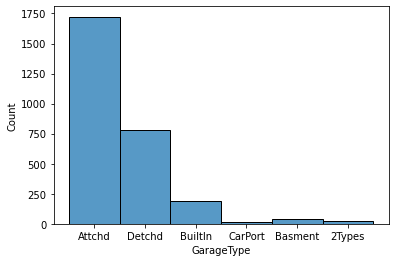

In [2913]:
# Impute missing values for these 2 houses first
# Before doing it, check the 'GarageType' distribution
sns.histplot(data = combined_data[combined_data['GarageFinish'].notnull()], x = 'GarageType')

# 'Attchd' is the most common & 'Detchd' is the second most common & 'BuiltIn' is the third
# The rest can be ignored

In [2914]:
# Based on the histogram, it is a good idea to impute 'GarageCond' & 'GarageQual' & 'GarageFinish' based on
# 'GarageType'
# Use the most common values (modes) from the 'GarageType' == 'Detchd' to impute missing values for house id = 2126
detchd_garage = combined_data['GarageType'] == 'Detchd'
combined_data.at[2126, 'GarageCond'] = combined_data[detchd_garage]['GarageCond'].mode()[0]
combined_data.at[2126, 'GarageQual'] = combined_data[detchd_garage]['GarageQual'].mode()[0]
combined_data.at[2126, 'GarageFinish'] = combined_data[detchd_garage]['GarageFinish'].mode()[0]

In [2915]:
# Do the same to impute 'GarageCond' & 'GarageQual' & 'GarageFinish' for house id = 2576
detchd_garage = combined_data['GarageType'] == 'Detchd'
combined_data.at[2576, 'GarageCond'] = combined_data[detchd_garage]['GarageCond'].mode()[0]
combined_data.at[2576, 'GarageQual'] = combined_data[detchd_garage]['GarageQual'].mode()[0]
combined_data.at[2576, 'GarageFinish'] = combined_data[detchd_garage]['GarageFinish'].mode()[0]

# Do not forget that 'GarageCars' & 'GarageArea' are missing for this house
# Same logic here:
# Impute 'GarageCars' & 'GarageArea' by using the most common values (modes) from the 'GarageType' == 'Detchd'
combined_data.at[2576, 'GarageCars'] = combined_data[detchd_garage]['GarageCars'].mode()[0]
combined_data.at[2576, 'GarageArea'] = combined_data[detchd_garage]['GarageArea'].mode()[0]

# There should be no missing values for columns 'GarageCars' & 'GarageArea'
print("The number of missing values in 'GarageCars': {}".format(combined_data['GarageCars'].isnull().sum()))
print("The number of missing values in 'GarageArea': {}".format(combined_data['GarageArea'].isnull().sum()))

# Now it is time to deal with 'GarageType' & 'GarageFinish' & 'GarageQual' & 'GarageCond' & 'GarageYrBlt'
# for the 157 houses without garages
# One "interesting" question is: How do we impute 'GarageYrBlt'?

The number of missing values in 'GarageCars': 0
The number of missing values in 'GarageArea': 0


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2592,20,RL,68.0,8298,Pave,None,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,4.0,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,0.0,None,None,0,9,2007,New,Partial


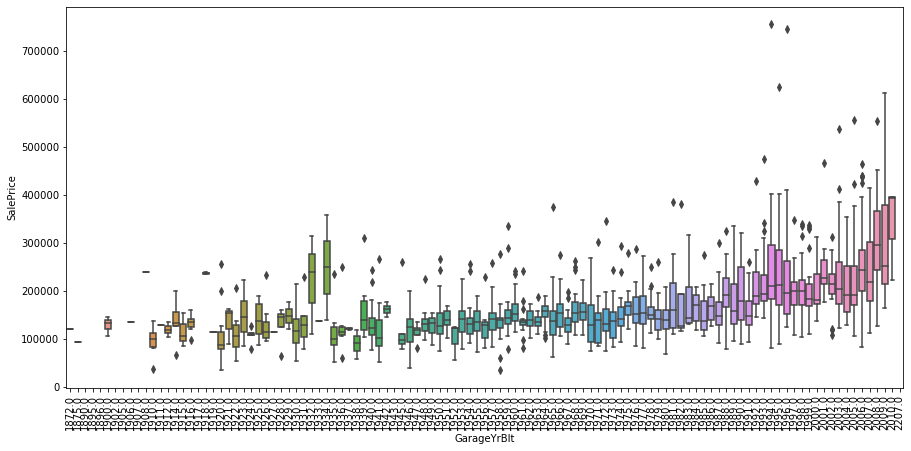

In [2916]:
# Impute 'GarageType' & 'GarageFinish' & 'GarageQual' & 'GarageCond' first and 'GarageYrBlt' last
# [GarageType - N] --- NA -> No garage --- BE CAREFUL!
combined_data['GarageType'] = combined_data['GarageType'].fillna('None')

# [GarageFinish - O] --- NA -> No garage --- BE CAREFUL!
combined_data['GarageFinish'] = combined_data['GarageFinish'].fillna('None')

# [GarageCond - O] --- NA -> No garage --- BE CAREFUL!
combined_data['GarageCond'] = combined_data['GarageCond'].fillna('None')

# [GarageQual - O] --- NA -> No garage --- BE CAREFUL!
combined_data['GarageQual'] = combined_data['GarageQual'].fillna('None')

# Now impute 'GarageYrBlt'
# [GarageYrBlt - O] --- NA -> missing value
# By checking 'YearBuilt' & 'YearRemodAdd', based on the data_description.txt,
# 'YearRemodAdd' is the same as 'YearBuilt' if no remodeling or additions
# Even though these 157 houses do not have garages, it is not a bad idea to replacing missing values
# in 'GarageYrBlt' with 'YearBuilt' rather than '0'
combined_data['GarageYrBlt'] = combined_data['GarageYrBlt'].fillna(combined_data['YearBuilt'])

# It seems like the new houses (small 'GarageYrBlt') are sold with higher price ('SalePrice')
# It is likely to be an ordinal variable (not numeric, but categorical)
garage_price = pd.concat([combined_data['GarageYrBlt'], train['SalePrice']], axis = 1)
plt.subplots(figsize = (15, 7))
sns.boxplot(x = 'GarageYrBlt', y = 'SalePrice', data = garage_price)
plt.xticks(rotation = 90)

# There are two problems spotted from the plot:
# 1) Year represented in float (it probably does not matter much)
# 2) The year of 2207.0 is clearly wrong
combined_data[combined_data['GarageYrBlt'] > 2010.0]

In [2917]:
# Correct this error
# 'YearBuilt' == 2006 & 'YearRemodAdd' == 2007 & 'YrSold' == 2007
# It is safe to use the default choice, which sets 'GarageYrBlt' as the same as 'YearBuilt'
combined_data.at[2592, 'GarageYrBlt'] = combined_data.at[2592, 'YearBuilt']

In [2918]:
# Use OrdinalEncoder to encode 'GarageFinish' & 'GarageCond' & 'GarageQual'
# ######## THINK: How to do encoding for 'GarageYrBlt' - leave it as numeric

# OrdinalEncoder for 'GarageFinish'
# 'None' -- 0 & 'Unf' -- 1 & 'RFn' -- 2 & 'Fin' -- 3
oe_garage_finish = OrdinalEncoder(categories = [['None', 'Unf', 'RFn', 'Fin']])
combined_data['GarageFinish'] = oe_garage_finish.fit_transform(combined_data[['GarageFinish']])

# OrdinalEncoder for 'GarageCond' & 'GarageQual' by reusing the #oe_qual_all# encoder
# 'None' -- 0 & 'Po' -- 1 & 'Fa' -- 2 & 'TA' -- 3 & 'Gd' -- 4 & 'Ex' -- 5
# oe_garage_cond_qual = OrdinalEncoder(categories = [['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']])
combined_data['GarageCond'] = oe_qual_all.fit_transform(combined_data[['GarageCond']])
combined_data['GarageQual'] = oe_qual_all.fit_transform(combined_data[['GarageQual']])

In [2919]:
##### Bsmt Group: 11 varaible #####
# BsmtExposure        82   2.809181
# BsmtCond            82   2.809181
# BsmtQual            81   2.774923
# BsmtFinType2        80   2.740665
# BsmtFinType1        79   2.706406
# BsmtFullBath         2   0.068517
# BsmtHalfBath         2   0.068517
# BsmtFinSF1           1   0.034258
# BsmtFinSF2           1   0.034258
# BsmtUnfSF            1   0.034258
# TotalBsmtSF          1   0.034258

# Similar to the analysis of the garage group, there are inconsistency between the below 5 categorical variables:
# 'BsmtExposure' & 'BsmtCond' & 'BsmtQual' & 'BsmtFinType2' & 'BsmtFinType1'
# First, check the 79 houses in 'BsmtFinType1' to see whether they are the same within the 80+ houses
missing_bsmt_exposure = combined_data[combined_data['BsmtExposure'].isnull().values].index
missing_bsmt_cond     = combined_data[combined_data['BsmtCond'].isnull().values].index
missing_bsmt_qual     = combined_data[combined_data['BsmtQual'].isnull().values].index
missing_bsmt_fintype2 = combined_data[combined_data['BsmtFinType2'].isnull().values].index
missing_bsmt_fintype1 = combined_data[combined_data['BsmtFinType1'].isnull().values].index

type1_type2_comp = missing_bsmt_fintype1.isin(missing_bsmt_fintype2).all()
type1_qual_comp = missing_bsmt_fintype1.isin(missing_bsmt_qual).all()
type1_cond_comp = missing_bsmt_fintype1.isin(missing_bsmt_cond).all()
type1_expo_comp = missing_bsmt_fintype1.isin(missing_bsmt_exposure).all()
print("Missing fin type 1 included in missing fin type 2 -> {}".format(type1_type2_comp))
print("Missing fin type 1 included in missing quality -> {}".format(type1_qual_comp))
print("Missing fin type 1 included in missing condition -> {}".format(type1_cond_comp))
print("Missing fin type 1 included in missing exposure -> {}".format(type1_expo_comp))

# All 79 houses are all included in 80+ houses
# Check the other houses (in 80+ houses & not in 79 houses)
not_missing_fintype1 = combined_data['BsmtFinType1'].notnull()
missing_fintype2 = combined_data['BsmtFinType2'].isnull()
missing_qual = combined_data['BsmtQual'].isnull()
missing_cond = combined_data['BsmtCond'].isnull()
missing_expo = combined_data['BsmtExposure'].isnull()

filter_cond = not_missing_fintype1 & (missing_fintype2 | missing_qual | missing_cond | missing_expo)
combined_data[filter_cond][['BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1',
                            'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                            'TotalBsmtSF']]

Missing fin type 1 included in missing fin type 2 -> True
Missing fin type 1 included in missing quality -> True
Missing fin type 1 included in missing condition -> True
Missing fin type 1 included in missing exposure -> True


,BsmtExposure,BsmtCond,BsmtQual,BsmtFinType2,BsmtFinType1,BsmtFullBath,BsmtHalfBath,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
332,No,TA,Gd,NaN,GLQ,1.0,0.0,1124.0,479.0,1603.0,3206.0
948,NaN,TA,Gd,Unf,Unf,0.0,0.0,0.0,0.0,936.0,936.0
1487,NaN,TA,Gd,Unf,Unf,0.0,0.0,0.0,0.0,1595.0,1595.0
2040,Mn,NaN,Gd,Rec,GLQ,1.0,0.0,1044.0,382.0,0.0,1426.0
2185,No,NaN,TA,Unf,BLQ,0.0,1.0,1033.0,0.0,94.0,1127.0
2217,No,Fa,NaN,Unf,Unf,0.0,0.0,0.0,0.0,173.0,173.0
2218,No,TA,NaN,Unf,Unf,0.0,0.0,0.0,0.0,356.0,356.0
2348,NaN,TA,Gd,Unf,Unf,0.0,0.0,0.0,0.0,725.0,725.0
2524,Av,NaN,TA,Unf,ALQ,0.0,0.0,755.0,0.0,240.0,995.0


<AxesSubplot:xlabel='BsmtFinType2', ylabel='BsmtFinSF2'>

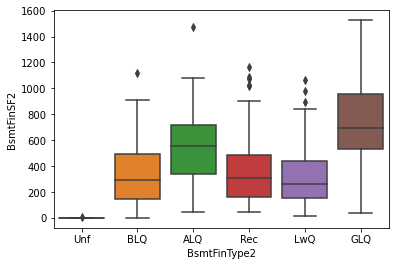

In [2920]:
# Impute missing values for these 9 houses
# Impute 'BsmtExposure' using modes (another option is using modes group by neighborhood)
# More domain knowledge could result a better choice, leave it for now
house_index_expo = [948, 1487, 2348]
combined_data.loc[combined_data.index.isin(house_index_expo), ['BsmtExposure']] = \
    combined_data['BsmtExposure'].mode()[0]

# Impute 'BsmtCond' using modes
house_index_cond = [2040, 2185, 2524]
combined_data.loc[combined_data.index.isin(house_index_cond), ['BsmtCond']] = combined_data['BsmtCond'].mode()[0]

# Impute 'BsmtQual' using modes
house_index_qual = [2217, 2218]
combined_data.loc[combined_data.index.isin(house_index_qual), ['BsmtQual']] = combined_data['BsmtQual'].mode()[0]

# Before imputing 'BsmtFinType2', it is a good idea to check 'BsmtFinSF2'
# It seems like 'BsmtFinType2' of house id = 332 could be 'Rec' (check the house id = 2040)
# Check the relationship between 'BsmtFinType2' & 'BsmtFinSF2' to further investigate
type2_area = pd.concat([combined_data['BsmtFinType2'], combined_data['BsmtFinSF2']], axis = 1)
sns.boxplot(x = 'BsmtFinType2', y = 'BsmtFinSF2', data = type2_area)

<AxesSubplot:xlabel='BsmtFinType2', ylabel='Count'>

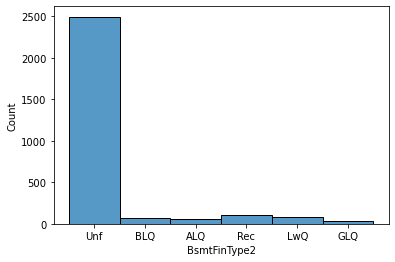

In [2921]:
# Check the distribution of 'BsmtFinType2'
sns.histplot(data = combined_data[combined_data['BsmtFinType2'].notnull()], x = 'BsmtFinType2')

In [2922]:
# Impute mode ('Rec') with 'Unf' excluded because 'BsmtFinType2' of all 'Unf' type basements are all 0
combined_data.at[332, 'BsmtFinType2'] = 'Rec'

In [2923]:
# Now impute missing values for the 79 houses
# [BsmtExposure - O] --- NA -> No basement --- BE CAREFUL!
combined_data['BsmtExposure'] = combined_data['BsmtExposure'].fillna('None')

# [BsmtCond - O] --- NA -> No basement --- BE CAREFUL!
combined_data['BsmtCond'] = combined_data['BsmtCond'].fillna('None')

# [BsmtQual - O] --- NA -> No basement --- BE CAREFUL!
combined_data['BsmtQual'] = combined_data['BsmtQual'].fillna('None')

# [BsmtFinType2 - O] --- NA -> No basement --- BE CAREFUL!
combined_data['BsmtFinType2'] = combined_data['BsmtFinType2'].fillna('None')

# [BsmtFinType1 - O] --- NA -> No basement --- BE CAREFUL!
combined_data['BsmtFinType1'] = combined_data['BsmtFinType1'].fillna('None')

# Check the remaining variables (with much less NAs):
# 'BsmtFullBath' & 'BsmtHalfBath' & 'BsmtFinSF1' & 'BsmtFinSF2' & 'BsmtUnfSF' & 'TotalBsmtSF'
missing_fullbath  = combined_data['BsmtFullBath'].isnull()
missing_halfbath  = combined_data['BsmtHalfBath'].isnull()
missing_fin1      = combined_data['BsmtFinSF1'].isnull()
missing_fin2      = combined_data['BsmtFinSF2'].isnull()
missing_unf       = combined_data['BsmtUnfSF'].isnull()
missing_totalbsmt = combined_data['TotalBsmtSF'].isnull()

filter_cond = missing_fullbath | missing_halfbath | missing_fin1 | missing_fin2 | missing_unf | missing_totalbsmt
combined_data[filter_cond][['BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1',
                            'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                            'TotalBsmtSF']]

,BsmtExposure,BsmtCond,BsmtQual,BsmtFinType2,BsmtFinType1,BsmtFullBath,BsmtHalfBath,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
2120,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
2188,None,None,None,None,None,NaN,NaN,0.0,0.0,0.0,0.0


In [2924]:
# Impute missing values for these 2 houses (id = 2120 & 2188)
# It is clear that both houses do not have basement
# Therefore, it is sensible to fill these NAs with 0
bsmt_variables = ['BsmtFullBath', 'BsmtHalfBath']
combined_data.loc[combined_data.index == 2188, bsmt_variables] = 0

bsmt_variables.extend(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'])
combined_data.loc[combined_data.index == 2120, bsmt_variables] = 0

# Double check missing values for the Bsmt group after imputing
print("The number of missing values in 'BsmtExposure': {}".format(combined_data['BsmtExposure'].isnull().sum()))
print("The number of missing values in 'BsmtCond': {}".format(combined_data['BsmtCond'].isnull().sum()))
print("The number of missing values in 'BsmtQual': {}".format(combined_data['BsmtQual'].isnull().sum()))
print("The number of missing values in 'BsmtFinType2': {}".format(combined_data['BsmtFinType2'].isnull().sum()))
print("The number of missing values in 'BsmtFinType1': {}".format(combined_data['BsmtFinType1'].isnull().sum()))
print("The number of missing values in 'BsmtFullBath': {}".format(combined_data['BsmtFullBath'].isnull().sum()))
print("The number of missing values in 'BsmtHalfBath': {}".format(combined_data['BsmtHalfBath'].isnull().sum()))
print("The number of missing values in 'BsmtFinSF1': {}".format(combined_data['BsmtFinSF1'].isnull().sum()))
print("The number of missing values in 'BsmtFinSF2': {}".format(combined_data['BsmtFinSF2'].isnull().sum()))
print("The number of missing values in 'BsmtUnfSF': {}".format(combined_data['BsmtUnfSF'].isnull().sum()))
print("The number of missing values in 'TotalBsmtSF': {}".format(combined_data['TotalBsmtSF'].isnull().sum()))

The number of missing values in 'BsmtExposure': 0
The number of missing values in 'BsmtCond': 0
The number of missing values in 'BsmtQual': 0
The number of missing values in 'BsmtFinType2': 0
The number of missing values in 'BsmtFinType1': 0
The number of missing values in 'BsmtFullBath': 0
The number of missing values in 'BsmtHalfBath': 0
The number of missing values in 'BsmtFinSF1': 0
The number of missing values in 'BsmtFinSF2': 0
The number of missing values in 'BsmtUnfSF': 0
The number of missing values in 'TotalBsmtSF': 0


In [2925]:
# Use OrdinalEncoder to encode 'BsmtExposure' & 'BsmtCond' & 'BsmtQual' & 'BsmtFinType2' & 'BsmtFinType1'

# OrdinalEncoder for 'BsmtExposure'
# 'None' -- 0 & 'No' -- 1 & 'Mn' -- 2 & 'Av' -- 3 & 'Gd' -- 4
oe_bsmt_expo = OrdinalEncoder(categories = [['None', 'No', 'Mn', 'Av', 'Gd']])
combined_data['BsmtExposure'] = oe_bsmt_expo.fit_transform(combined_data[['BsmtExposure']])

# OrdinalEncoder for 'BsmtCond' & 'BsmtQual' by reusing the #oe_qual_all# encoder
# 'None' -- 0 & 'Po' -- 1 & 'Fa' -- 2 & 'TA' -- 3 & 'Gd' -- 4 & 'Ex' -- 5
# oe_bsmt_cond_qual = OrdinalEncoder(categories = [['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']])
combined_data['BsmtCond'] = oe_qual_all.fit_transform(combined_data[['BsmtCond']])
combined_data['BsmtQual'] = oe_qual_all.fit_transform(combined_data[['BsmtQual']])

# OrdinalEncoder for 'BsmtFinType2' & 'BsmtFinType1'
# 'None' -- 0 & 'Unf' -- 1 & 'LwQ' -- 2 & 'Rec' -- 3 & 'BLQ' -- 4 & 'ALQ' -- 5 & 'GLQ' -- 6
oe_bsmt_type1_type2 = OrdinalEncoder(categories = [['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']])
combined_data['BsmtFinType2'] = oe_bsmt_type1_type2.fit_transform(combined_data[['BsmtFinType2']])
combined_data['BsmtFinType1'] = oe_bsmt_type1_type2.fit_transform(combined_data[['BsmtFinType1']])

In [2926]:
##### Mas Group: 2 varaible #####
# MasVnrType          24   0.822199
# MasVnrArea          23   0.787941

# Same as above, investigate the inconsistency between the number of NAs
missing_mas_type = combined_data[combined_data['MasVnrType'].isnull().values].index
missing_mas_area = combined_data[combined_data['MasVnrArea'].isnull().values].index

type_area_comp = missing_bsmt_fintype1.isin(missing_bsmt_exposure).all()
print("Missing masonry veneer type included in missing masonry area -> {}".format(type_area_comp))

Missing masonry veneer type included in missing masonry area -> True


In [2927]:
# Find the single house with 'MasVnrType' missing
filter_cond = (combined_data['MasVnrType'].isnull()) & (combined_data['MasVnrArea'].notnull())
combined_data[filter_cond][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
2610,NaN,198.0


<AxesSubplot:xlabel='MasVnrType', ylabel='MasVnrArea'>

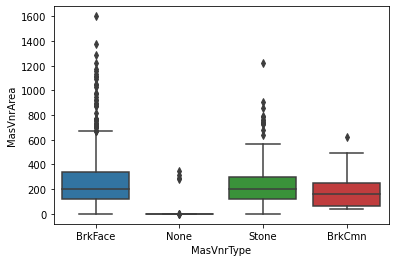

In [2928]:
# Before imputing, check the relationship between 'BsmtFinType2' & 'BsmtFinSF2' to further investigate
mas_type_area = pd.concat([combined_data['MasVnrType'], combined_data['MasVnrArea']], axis = 1)
sns.boxplot(x = 'MasVnrType', y = 'MasVnrArea', data = mas_type_area)

<AxesSubplot:xlabel='MasVnrType', ylabel='Count'>

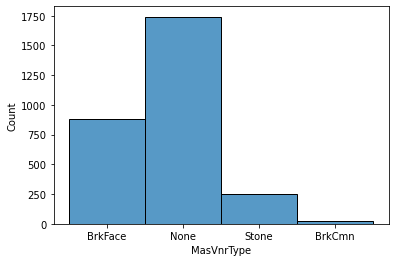

In [2929]:
# Check the distribution of 'MasVnrType'
sns.histplot(data = combined_data[combined_data['MasVnrType'].notnull()], x = 'MasVnrType')

In [2930]:
# Majority houses without masonry (with 'MasVnrType' == 'None') have 'MasVnrArea' == 0
# Impute mode ('BrkFace') with 'None' excluded
combined_data.at[2610, 'MasVnrType'] = 'BrkFace'

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

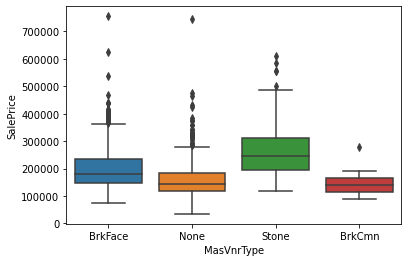

In [2931]:
# Now impute missing values for the 23 houses without masonry
# [MasVnrType - O] --- NA/None -> None/No masonry
combined_data['MasVnrType'] = combined_data['MasVnrType'].fillna('None')

# [MasVnrArea - Numeric] --- NA -> missing value
combined_data['MasVnrArea'] = combined_data['MasVnrArea'].fillna(0)

# Investigate the relationship between 'MasVnrType' & 'SalePrice' to see any ordering in 'MasVnrType'
# 'Stone' > 'BrkFace' > 'BrkCmn' >= 'None'
mas_type_price = pd.concat([combined_data['MasVnrType'], train['SalePrice']], axis = 1)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = mas_type_price)

In [2932]:
# Use OrdinalEncoder to encode 'MasVnrType'
# 'None/BrkCmn' -- 0 & 'BrkFace' -- 1 & 'Stone' -- 2
# The reason of ranking 'BrkCmn' as same as 'None' (both 0) is that there is very little difference
# for 'SalePrice' between both types of masonry ('BrkCmn' & 'None') (check the above boxplot)
# Also, there are only a very few houses have the 'BrkCmn' type of masonries (check the above histogram)
# Therefore, it makes more sense to give equal ranks for 'BrkCmn' & 'None' (preferred)
# Of course, it is arguable that having a 'BrkCmn' type of masonry is better than not having a masonry at all
# First, replace 'BrkCmn' with 'None' to make encoding easier
# ######## THINK: Is it a good idea to do the replacement
combined_data['MasVnrType'] = combined_data['MasVnrType'].replace(['BrkCmn'], 'None')

# Now OrdinalEncoder for 'MasVnrType'
oe_mas_type = OrdinalEncoder(categories = [['None', 'BrkFace', 'Stone']])
combined_data['MasVnrType'] = oe_mas_type.fit_transform(combined_data[['MasVnrType']])

In [2933]:
# MSZoning             4   0.137033
# [MSZoning - N] --- NA -> missing value
# Impute using modes
combined_data['MSZoning'] = combined_data['MSZoning'].fillna(combined_data['MSZoning'].mode()[0])

In [2934]:
# Utilities            2   0.068517
# [Utilities - O] --- NA -> missing value
combined_data[combined_data['Utilities'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1915,30,RL,109.0,21780,Grvl,None,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,0.0,0.0,Fa,Fa,CBlock,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,0.0,Detchd,1975.0,1.0,1.0,280.0,3.0,3.0,N,119,24,0,0,0,0,0.0,None,None,0,3,2009,ConLD,Normal
1945,20,RL,64.0,31220,Pave,None,IR1,Bnk,NaN,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6,2,1952,1952,Hip,CompShg,BrkFace,BrkFace,0.0,0.0,TA,TA,CBlock,3.0,3.0,1.0,1.0,0.0,1.0,0.0,1632.0,1632.0,GasA,TA,Y,FuseA,1474,0,0,1474,0.0,0.0,1,0,3,1,TA,7,Min2,2,4.0,Attchd,1952.0,1.0,2.0,495.0,3.0,3.0,Y,0,0,144,0,0,0,0.0,None,Shed,750,5,2008,WD,Normal


<AxesSubplot:xlabel='Utilities', ylabel='Count'>

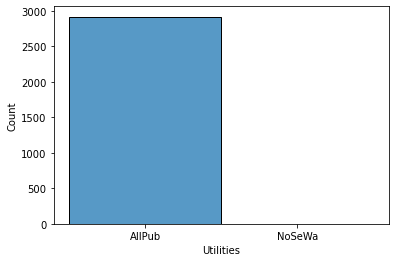

In [2935]:
# Check the distribution of 'Utilities'
sns.histplot(data = combined_data[combined_data['Utilities'].notnull()], x = 'Utilities')

In [2936]:
# Almost all houses have 'AllPub'
# Count the values
combined_data[combined_data['Utilities'].notnull()][['Utilities']].value_counts()

Utilities
AllPub       2916
NoSeWa          1
dtype: int64

In [2937]:
# Find out the house with 'Utilities' == 'NoSeWa'
# By the way, it is in the train dataset (id == 944 < 1460)
# Check out train['SalePrice'] to further confirm if wanted
combined_data[combined_data['Utilities'] == 'NoSeWa']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
944,20,RL,82.0,14375,Pave,None,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,Norm,Norm,1Fam,SLvl,6,6,1958,1958,Gable,CompShg,HdBoard,HdBoard,1.0,541.0,TA,TA,CBlock,3.0,3.0,1.0,6.0,111.0,3.0,354.0,354.0,819.0,GasA,Gd,Y,FuseA,1344,0,0,1344,0.0,1.0,1,0,3,1,Gd,7,Typ,1,4.0,Basment,1958.0,2.0,2.0,525.0,3.0,3.0,Y,0,118,0,0,233,0,0.0,None,None,0,1,2009,COD,Abnorml


In [2938]:
# If imputing 'AllPub' for the above houses (id == 1915 & 1945 > 1461 --- they are in the test dataset btw)
# All houses in the test dataset will all have 'Utilities' == 'AllPub'
# It makes 'Utilities' useless for prediction
# Drop the 'Utilities' column for both train and test datasets
combined_data.drop(['Utilities'], axis = 1, inplace = True)

In [2939]:
# Print the missing data table again so that no need to scrolling up-and-down
print(missing_data)

              NA Count  Ratio (%)
PoolQC            2909  99.657417
MiscFeature       2814  96.402878
Alley             2721  93.216855
Fence             2348  80.438506
FireplaceQu       1420  48.646797
LotFrontage        486  16.649538
GarageFinish       159   5.447071
GarageYrBlt        159   5.447071
GarageQual         159   5.447071
GarageCond         159   5.447071
GarageType         157   5.378554
BsmtExposure        82   2.809181
BsmtCond            82   2.809181
BsmtQual            81   2.774923
BsmtFinType2        80   2.740665
BsmtFinType1        79   2.706406
MasVnrType          24   0.822199
MasVnrArea          23   0.787941
MSZoning             4   0.137033
BsmtFullBath         2   0.068517
BsmtHalfBath         2   0.068517
Utilities            2   0.068517
Functional           2   0.068517
Exterior2nd          1   0.034258
Exterior1st          1   0.034258
SaleType             1   0.034258
BsmtFinSF1           1   0.034258
BsmtFinSF2           1   0.034258
BsmtUnfSF     

In [2940]:
# Functional           2   0.068517
# [Functional - O] --- NA -> missing value
# Count the values first
combined_data[combined_data['Functional'].notnull()][['Functional']].value_counts()

Functional
Typ           2717
Min2            70
Min1            65
Mod             35
Maj1            19
Maj2             9
Sev              2
dtype: int64

In [2941]:
# Most houses have 'Functional' == 'Typ'
# The data_description.txt also mentions that "Assume typical unless deductions are warranted"
# So it is safe to replace NA with mode, which is 'Type'
combined_data['Functional'] = combined_data['Functional'].fillna(combined_data['Functional'].mode()[0])

In [2942]:
# OrdinalEncoder for 'Functional'
# 'None' -- 0 & 'Sal' -- 1 & 'Sev' -- 2 & 'Maj2' -- 3 & 'Maj1' -- 4 & 'Mod' -- 5 & 'Min2' -- 6 &
# 'Min1' -- 7 & 'Typ' -- 8
# None is introduced to make the valid rank start from 1 rather than 0
oe_funtional = OrdinalEncoder(categories = [['None', 'Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']])
combined_data['Functional'] = oe_funtional.fit_transform(combined_data[['Functional']])

In [2943]:
##### Exter Group: 2 varaible #####
# Exterior2nd          1   0.034258
# Exterior1st          1   0.034258
# ExterQual & ExterCond are also related (but no missing values)

# Check if it is the same house
missing_exter2 = combined_data[combined_data['Exterior2nd'].isnull().values].index
missing_exter1 = combined_data[combined_data['Exterior1st'].isnull().values].index

exter_comp = missing_exter2.equals(missing_exter1)
print("Exterior 2nd and 1st comparison: Same -> {}".format(exter_comp))

# [Exterior2nd - N] --- NA -> missing value
# [Exterior1st - N] --- NA -> missing value
# Impute with mode for both
combined_data['Exterior2nd'] = combined_data['Exterior2nd'].fillna(combined_data['Exterior2nd'].mode()[0])
combined_data['Exterior1st'] = combined_data['Exterior1st'].fillna(combined_data['Exterior1st'].mode()[0])

Exterior 2nd and 1st comparison: Same -> True


In [2944]:
##### Sale Group: 1 varaible #####
# SaleType             1   0.034258
# SaleCondition is also related (but no missing values)

# Check this house
combined_data[combined_data['SaleType'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2489,20,RL,85.0,13770,Pave,None,Reg,Lvl,Corner,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,6,1958,1998,Gable,CompShg,Plywood,Plywood,1.0,340.0,TA,TA,CBlock,3.0,3.0,2.0,3.0,190.0,4.0,873.0,95.0,1158.0,GasA,TA,Y,SBrkr,1176,0,0,1176,1.0,0.0,1,0,3,1,TA,6,8.0,2,4.0,Attchd,1958.0,1.0,1.0,303.0,3.0,3.0,Y,0,0,0,0,0,0,0.0,None,None,0,10,2007,NaN,Normal


In [2945]:
# 'SaleCondition' == 'Normal', impute 'SaleType' with modes under this group ('SaleCondition' == 'Normal')
# [SaleType - N] --- NA -> missing value
combined_data.at[2489, 'SaleType'] = combined_data[combined_data['SaleCondition'] == 'Normal']['SaleType'].mode()[0]

In [2946]:
# Electrical           1   0.034258
# [Electrical - O] --- NA -> missing value
# Count the values first
combined_data[combined_data['Electrical'].notnull()][['Electrical']].value_counts()

Electrical
SBrkr         2671
FuseA          188
FuseF           50
FuseP            8
Mix              1
dtype: int64

In [2947]:
# Impute with mode
combined_data['Electrical'] = combined_data['Electrical'].fillna(combined_data['Electrical'].mode()[0])

In [2948]:
# OrdinalEncoder for 'Electrical'
# 'None' -- 0 & 'Mix' -- 1 & 'FuseP' -- 2 & 'FuseF' -- 3 & 'FuseA' -- 4 & 'SBrkr' -- 5
# None is introduced for the same reason (valid rank starts with 1)
oe_electrical = OrdinalEncoder(categories = [['None', 'Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']])
combined_data['Electrical'] = oe_electrical.fit_transform(combined_data[['Electrical']])

In [2949]:
# LAST ONE
##### Kitchen Group: 1 varaible #####
# KitchenQual          1   0.034258
# KitchenAbvGr is also related (but no missing values)
# A mistake: in data_description, 'Kitchen' is actually 'KitchenAbvGr'
# Count the values first
combined_data[combined_data['KitchenQual'].notnull()][['KitchenQual']].value_counts()

KitchenQual
TA             1492
Gd             1151
Ex              205
Fa               70
dtype: int64

<AxesSubplot:xlabel='KitchenQual', ylabel='KitchenAbvGr'>

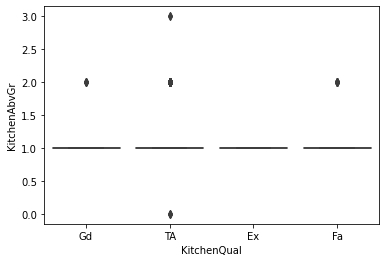

In [2950]:
# 'TA' & 'Gd' are relatively close, investigate the relationship between 'KitchenQual' & 'Kitchen'
kitchen_qual_num = pd.concat([combined_data['KitchenQual'], combined_data['KitchenAbvGr']], axis = 1)
sns.boxplot(x = 'KitchenQual', y = 'KitchenAbvGr', data = kitchen_qual_num)

In [2951]:
# Almost all houses have a single kitchen
# [KitchenQual - O] --- NA -> missing value
# Impute the mode ('TA') is fine
combined_data['KitchenQual'] = combined_data['KitchenQual'].fillna(combined_data['KitchenQual'].mode()[0])

In [2952]:
# OrdinalEncoder for 'Functional' by reusing the #oe_qual_all# encoder
# 'None' -- 0 (not included in dataset) & 'Po' -- 1 & 'Fa' -- 2 & 'TA' -- 3 & 'Gd' -- 4 & 'Ex' -- 5
# oe_funtional = OrdinalEncoder(categories = [['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']])
combined_data['KitchenQual'] = oe_qual_all.fit_transform(combined_data[['KitchenQual']])

In [2953]:
# So far, imputing missing data is all done
print("Any missing value left in the combined dataset --> {}".format(combined_data.isnull().sum().any() > 0))

Any missing value left in the combined dataset --> False


## Data Preparation
### It is time to do encoding the for remaining categorical variables (without missing values).

In [2954]:
# Check what are left
combined_data.select_dtypes(include = 'object').columns
# The list also includes some nominal variables when handling missing values
# These variables can be left alone
# Use get_dummies to encode all nominal variables at the end of the section

# Copy and column list and identify each to select the oridinal variables (also grouping the related variables by ~):
# Oridnal: 'Street' ~ 'PavedDrive' & 'LotShape' & 'LandSlope' & 'ExterQual' ~ 'ExterCond' &
#          'HeatingQC' ~ 'CentralAir'
# Nominal: 'MSZoning' & 'Alley' & 'LandContour' & 'LotConfig' & 'Neighborhood' ~ 'Condition1' ~ 'Condition2' & 
#          'BldgType' ~ 'HouseStyle' & 'RoofStyle' ~ 'RoofMatl' & 'Exterior1st' ~ 'Exterior2nd' &
#          'Foundation' & 'Heating' & 'GarageType' & 'Fence' & 'MiscFeature' & 'SaleType' ~ 'SaleCondition'

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC',
       'CentralAir', 'GarageType', 'PavedDrive', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

<AxesSubplot:xlabel='Alley', ylabel='SalePrice'>

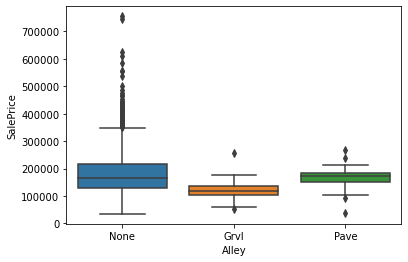

In [2955]:
# Check the relationship between 'Alley' & 'SalePrice' to see any ordering in 'Alley'
# It is logical to think 'Alley' is ordinal as 'Pave' > 'Grvl' > 'None'
# Pave' > 'Grvl' is reflected from the boxplot
# However, 'Grvl' > 'None' is not, neither is 'Pave' > 'None' 
alley_price = pd.concat([combined_data['Alley'], train['SalePrice']], axis = 1)
sns.boxplot(x = 'Alley', y = 'SalePrice', data = alley_price)

<AxesSubplot:xlabel='Alley', ylabel='Count'>

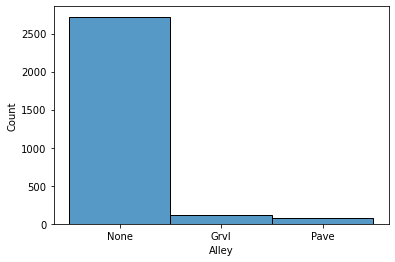

In [2956]:
# Check the distribution of 'Alley' to further confirm
# It shows that most houses do not have an alley access
# It is probably better to make 'Alley' nominal rather than ordinal even though it looks very ordinal
sns.histplot(data = combined_data[combined_data['Alley'].notnull()], x = 'Alley')

<AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>

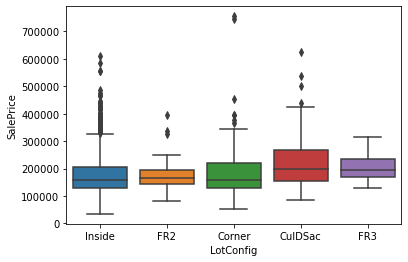

In [2957]:
# Check the relationship between 'LotConfig' & 'SalePrice' to see any ordering in 'LotConfig'
# No ordinality
lot_config_price = pd.concat([combined_data['LotConfig'], train['SalePrice']], axis = 1)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = lot_config_price)

<AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>

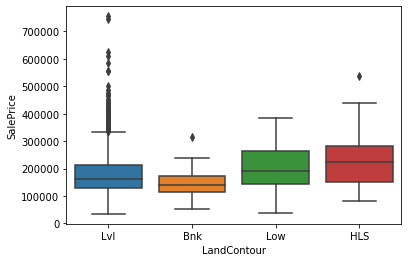

In [2958]:
# Check 'LandContour' & 'SalePrice'
# No ordinality
land_contour_price = pd.concat([combined_data['LandContour'], train['SalePrice']], axis = 1)
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = land_contour_price)

<AxesSubplot:xlabel='Condition1', ylabel='SalePrice'>

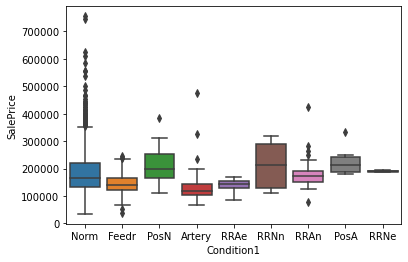

In [2959]:
# Check 'Condition1' & 'SalePrice'
# No ordinality
condition1_price = pd.concat([combined_data['Condition1'], train['SalePrice']], axis = 1)
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = condition1_price)

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

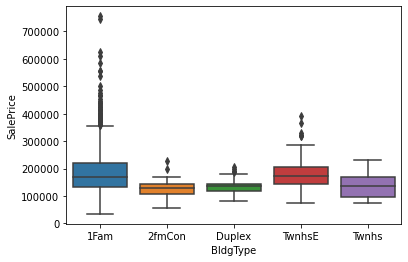

In [2960]:
# Check 'BldgType' & 'SalePrice'
# It looks like a ordinal variable
# However, from the visualisation, it does not show strong ordinality
bldg_type_price = pd.concat([combined_data['BldgType'], train['SalePrice']], axis = 1)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = bldg_type_price)

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

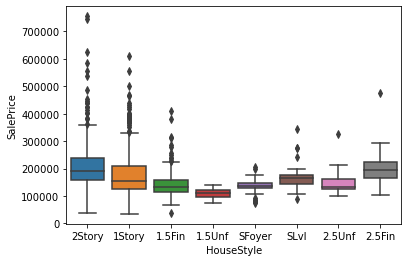

In [2961]:
# Check 'HouseStyle' & 'SalePrice'
# Again, it looks like a ordinal variable, but no strong ordinality shown
bldg_style_price = pd.concat([combined_data['HouseStyle'], train['SalePrice']], axis = 1)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = bldg_style_price)

<AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>

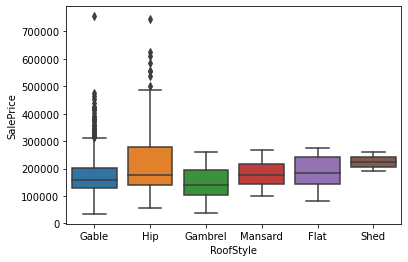

In [2962]:
# Check 'RoofStyle' & 'SalePrice'
# No ordinality
roof_style_price = pd.concat([combined_data['RoofStyle'], train['SalePrice']], axis = 1)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = roof_style_price)

<AxesSubplot:xlabel='RoofMatl', ylabel='SalePrice'>

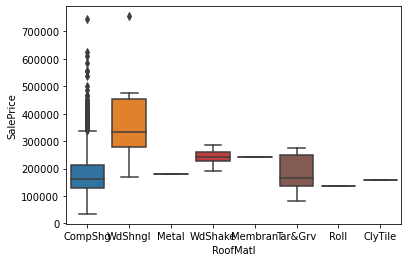

In [2963]:
# Check 'RoofMatl' & 'SalePrice'
# No ordinality
roof_matl_price = pd.concat([combined_data['RoofMatl'], train['SalePrice']], axis = 1)
sns.boxplot(x = 'RoofMatl', y = 'SalePrice', data = roof_matl_price)

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

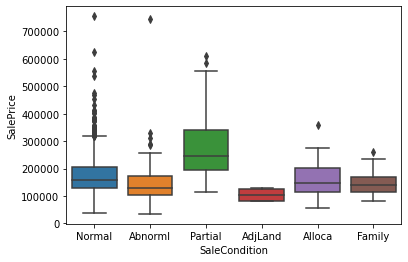

In [2964]:
# Check 'SaleCondition' & 'SalePrice'
# No ordinality
sale_condition_price = pd.concat([combined_data['SaleCondition'], train['SalePrice']], axis = 1)
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = sale_condition_price)

In [2965]:
# Now use OrdinalEncoder to encode:
# 'Street' ~ 'PavedDrive' & 'LotShape' & 'LandSlope' & 'ExterQual' ~ 'ExterCond' & 'HeatingQC' ~ 'CentralAir'

# 'Street'
# 'None' -- 0 & 'Grvl' -- 1 & 'Pave' -- 2  
oe_street = OrdinalEncoder(categories = [['None', 'Grvl', 'Pave']])
combined_data['Street'] = oe_street.fit_transform(combined_data[['Street']])

# 'PavedDrive'
# 'None' -- 0 & 'N' (Dirt/Gravel) -- 1 & 'P' -- 2 & 'Y' -- 3
oe_pdrive = OrdinalEncoder(categories = [['None', 'N', 'P', 'Y']])
combined_data['PavedDrive'] = oe_pdrive.fit_transform(combined_data[['PavedDrive']])

# 'LotShape'
# 'None' -- 0 & 'IR3' -- 1 & 'IR2' -- 2 & 'IR1' -- 3 & 'Reg' -- 4
oe_lot_shape = OrdinalEncoder(categories = [['None', 'IR3', 'IR2', 'IR1', 'Reg']])
combined_data['LotShape'] = oe_lot_shape.fit_transform(combined_data[['LotShape']])
    
# 'LandSlope'
# 'None' -- 0 & 'Sev' -- 1 & 'Mod' -- 2 & 'Gtl' -- 3
oe_land_slope = OrdinalEncoder(categories = [['None', 'Sev', 'Mod', 'Gtl']])
combined_data['LandSlope'] = oe_land_slope.fit_transform(combined_data[['LandSlope']])

# 'ExterQual' & 'ExterCond' & 'HeatingQC' by reusing the #oe_qual_all# encoder
# 'None' -- 0 & 'Po' -- 1 & 'Fa' -- 2 & 'TA' -- 3 & 'Gd' -- 4 & 'Ex' -- 5
combined_data['ExterQual'] = oe_qual_all.fit_transform(combined_data[['ExterQual']])
combined_data['ExterCond'] = oe_qual_all.fit_transform(combined_data[['ExterCond']])
combined_data['HeatingQC'] = oe_qual_all.fit_transform(combined_data[['HeatingQC']])

# 'CentralAir'
# 'N' -- 0 & 'Y' -- 1
oe_centl_air = OrdinalEncoder(categories = [['N', 'Y']])
combined_data['CentralAir'] = oe_centl_air.fit_transform(combined_data[['CentralAir']])

## Before processing all nominal variables, it is time to transform some numerical variables which are actually categorical, such as 'MSSubClass'.

In [2966]:
# First, find all numeric variables
num_cols = train.select_dtypes('number').columns
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

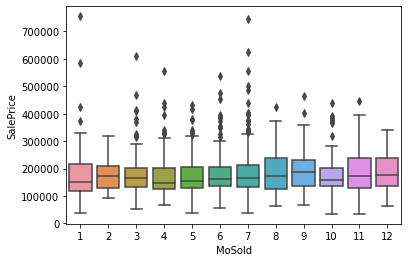

In [2967]:
# The numerical variables may needed to be transformed into categorical variables:
# 'MSSubClass' & 'OverallQual' & 'OverallCond' & 'MoSold' & 'YrSold'
# Need further check to confirm 'MoSold' & 'YrSold'
# Check 'MoSold' -- nominal variable
month_sold_price = pd.concat([combined_data['MoSold'], train['SalePrice']], axis = 1)
sns.boxplot(x = 'MoSold', y = 'SalePrice', data = month_sold_price)

In [2968]:
# Convert ['MoSold' - N] to 'str/object'
combined_data['MoSold'] = combined_data['MoSold'].astype(str)

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

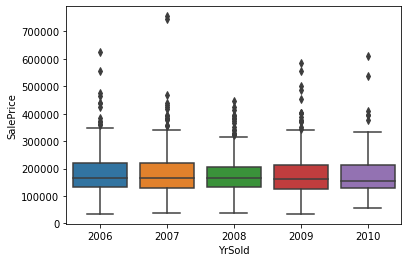

In [2969]:
# Check 'YrSold' -- nominal variable
year_sold_price = pd.concat([combined_data['YrSold'], train['SalePrice']], axis = 1)
sns.boxplot(x = 'YrSold', y = 'SalePrice', data = year_sold_price)

In [2970]:
# Convert ['YrSold' - N] to 'str/object'
combined_data['YrSold'] = combined_data['YrSold'].astype(str)

In [2971]:
# Convert ['MSSubClass' - N] to 'str/object'
combined_data['MSSubClass'] = combined_data['MSSubClass'].astype(str)

In [2972]:
# ['OverallQual' & 'OverallCond' - O]
# The current values assigned to each type of quality/condition makes sense so there is no need to convert them
# Because if they are converted into str first, later on when using OrdinalEncoder to encode them, the result
# would be the same as it is before the initial conversion

# Check the number of numeric and categorical variables
num_cols = combined_data.select_dtypes('number').columns
print("There are {} numeric variables.".format(len(num_cols)))
categorical_cols = combined_data.select_dtypes('object').columns
print("There are {} categorical variables.".format(len(categorical_cols)))

There are 55 numeric variables.
There are 23 categorical variables.


In [2973]:
# Check the shape of the combined dataset & it matches with the total number of numeric & categorical variables
print("The size of the combined dataset is {}".format(combined_data.shape))

The size of the combined dataset is (2919, 78)


There are 56 numeric variables to be included in the correlation matrix


<ipython-input-2974-7fd49e1a53b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_processed['SalePrice'] = y_train


<AxesSubplot:>

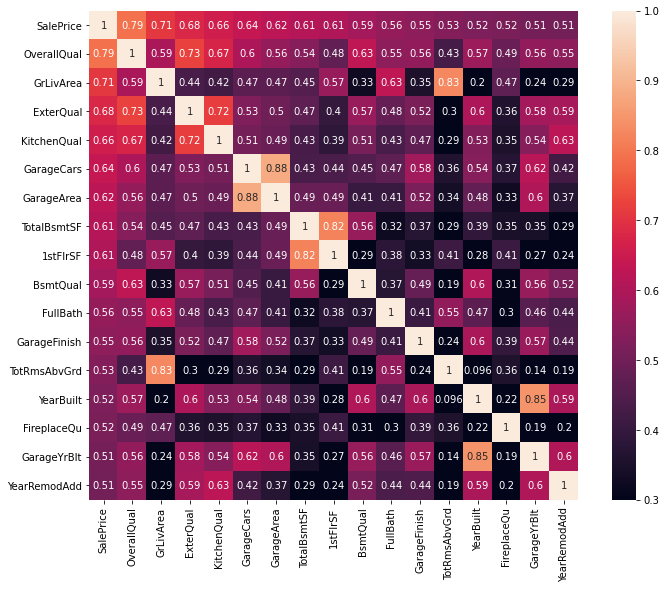

In [2974]:
# Correlation matrix again for the 55 numeric variables
train_processed = combined_data[:1460]
train_processed['SalePrice'] = y_train

num_cols_processed = train_processed.select_dtypes('number').columns
print("There are {} numeric variables to be included in the correlation matrix".format(len(num_cols_processed)))

corrmat_processed = train_processed[num_cols_processed].corr()
# Sort correlations with 'SalePrice' in descending orders (most important -> least important correlations)
corrmat_processed_sorted = corrmat_processed.sort_values(by = ['SalePrice'], ascending = False)
# Select only high correlations with values > 0.5 (pick those columns)
processed_high_corr_cols = corrmat_processed_sorted[corrmat_processed_sorted['SalePrice'] > 0.5].index

# Rebuild the correlation matrix for these high correlations with 'SalePrice'
corrmat_processed_high = train_processed[processed_high_corr_cols].corr()

plt.subplots(figsize = (12, 9))
# vmin = 0.3 is used for a clearer visualisation of the correlation matrix
sns.heatmap(corrmat_processed_high, vmin = 0.3, annot = True, square = True)

## Feature Engineering

In [2975]:
# Bathroom variables:
# 'BsmtFullBath' & 'BsmtHalfBath' & 'FullBath' & 'HalfBath'
# It is not a bad idea to combine these 4 variables to make a stronger one
# Also, it looks sensible to give half weight to half bathrooms
# ######## THINK: After creating a new feature from existing ones, should the existing features be removed?
#                 If no, does it cause the multilinearity problem between the created new and existing features?
# - No. Probably not. Because they are representing different (but related) aspects of the data
# - For instance, in the dataset, '1stFlrSF' + '2ndFlrSF' = 'GrLivArea', and all three variables are kept
# - Another example, 'BsmtFinSF1' + 'BsmtFinSF2' + 'BsmtUnfSF' = 'TotalBsmtSF'
combined_data['TotalBathRooms'] = combined_data['BsmtFullBath'] + (combined_data['BsmtHalfBath'] * 0.5) + \
                                  combined_data['FullBath'] + (combined_data['HalfBath'] * 0.5)

<AxesSubplot:>

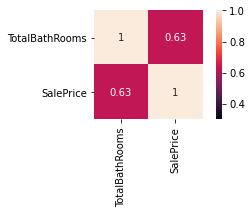

In [2976]:
# Check the correlation between the new feature 'TotalBathRooms' & 'SalePrice'
total_bathrooms_price = pd.concat([combined_data['TotalBathRooms'], train['SalePrice']], axis = 1)
corrmat_bathrooms_price = total_bathrooms_price.corr()

plt.subplots(figsize = (5, 2))
sns.heatmap(corrmat_bathrooms_price, vmin = 0.3, annot = True, square = True)

In [2977]:
# Square feet variables:
# There are many
# However, thinking of total square feet of a house, combine 'GrLivArea' and 'TotalBsmtSF' look sensible
combined_data['TotalSF'] = combined_data['GrLivArea'] + combined_data['TotalBsmtSF']

<AxesSubplot:>

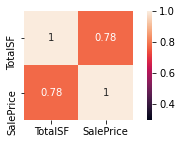

In [2978]:
# Check the correlation between the new feature 'TotalSF' & 'SalePrice'
total_square_feet_price = pd.concat([combined_data['TotalSF'], train['SalePrice']], axis = 1)
corrmat_square_feet_price = total_square_feet_price.corr()

plt.subplots(figsize = (5, 2))
sns.heatmap(corrmat_square_feet_price, vmin = 0.3, annot = True, square = True)

In [2979]:
# Porch variables:
# 'OpenPorchSF' & 'EnclosedPorch' & '3SsnPorch' & 'ScreenPorch' & 'WoodDeckSF'
# Whether or not to include 'WoodDeckSF' is based on judgment
# It is probably make sense to combine them into a total porch variable
combined_data['TotalPorchSF'] = combined_data['OpenPorchSF'] + combined_data['EnclosedPorch'] + \
                                combined_data['3SsnPorch'] + combined_data['ScreenPorch'] + \
                                combined_data['WoodDeckSF']

<AxesSubplot:>

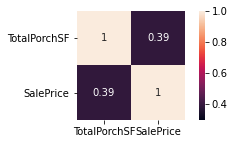

In [2980]:
# Check the correlation between the new feature 'TotalPorchSF' & 'SalePrice'
total_porch_price = pd.concat([combined_data['TotalPorchSF'], train['SalePrice']], axis = 1)
corrmat_porch_price = total_porch_price.corr()

# A relative weak correlation
plt.subplots(figsize = (5, 2))
sns.heatmap(corrmat_porch_price, vmin = 0.3, annot = True, square = True)

In [2981]:
# Add a new feature to combine 'YearBuilt' & 'YearRemodAdd' to reflect the house year
combined_data['YrBltAndRemod'] = combined_data['YearBuilt'] + combined_data['YearRemodAdd']

<AxesSubplot:>

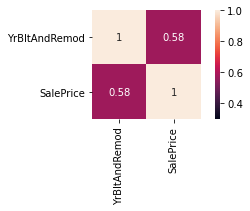

In [2982]:
# Check the correlation between the new feature 'YrBltAndRemod' & 'SalePrice'
year_built_remod_price = pd.concat([combined_data['YrBltAndRemod'], train['SalePrice']], axis = 1)
corrmat_year_price = year_built_remod_price.corr()

# A relative weak correlation
plt.subplots(figsize = (5, 2))
sns.heatmap(corrmat_year_price, vmin = 0.3, annot = True, square = True)

In [2983]:
# Add a new feature to combine 'OverallQual' & 'OverallCond' to reflect the overall quality of a house
combined_data['TotalHouseQual'] = combined_data['OverallQual'] + combined_data['OverallCond']

<AxesSubplot:>

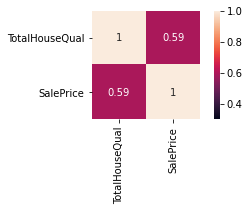

In [2984]:
# Check the correlation between the new feature 'TotalHouseQual' & 'SalePrice'
total_qual_price = pd.concat([combined_data['TotalHouseQual'], train['SalePrice']], axis = 1)
corrmat_qual_price = total_qual_price.corr()

# A relative weak correlation
plt.subplots(figsize = (5, 2))
sns.heatmap(corrmat_qual_price, vmin = 0.3, annot = True, square = True)

In [2985]:
# Add a number of boolean features to reflect various house properties
combined_data['HasPool'] = combined_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
combined_data['Has2ndFloor'] = combined_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
combined_data['HasGarage'] = combined_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
combined_data['HasBsmt'] = combined_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
combined_data['HasFireplace'] = combined_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

## More Data Preparation (outlier, normalisation, multicollinearity, skewness, nominal variables)

### Multicollinearity

<ipython-input-2986-3225319b49e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_processed['SalePrice'] = y_train


There are 66 numeric variables to be included in the correlation matrix


<AxesSubplot:>

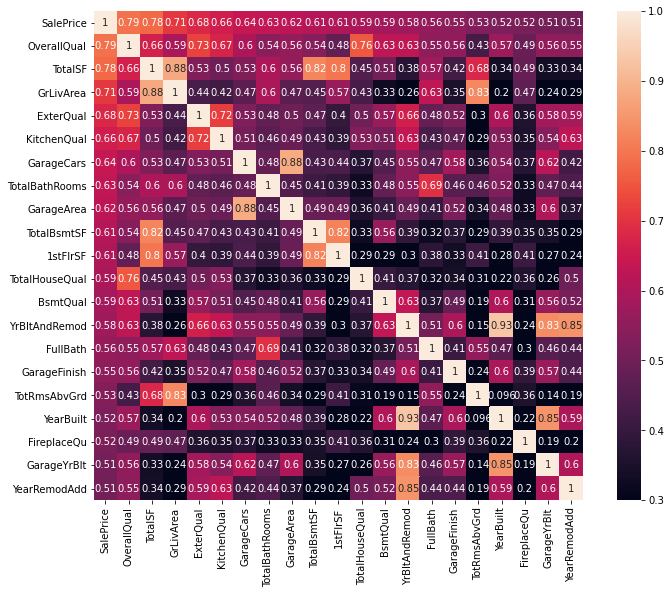

In [2986]:
train_processed = combined_data[:1460]
train_processed['SalePrice'] = y_train

num_cols_processed = train_processed.select_dtypes('number').columns
print("There are {} numeric variables to be included in the correlation matrix".format(len(num_cols_processed)))

corrmat_processed = train_processed[num_cols_processed].corr()
# Sort correlations with 'SalePrice' in descending orders (most important -> least important correlations)
corrmat_processed_sorted = corrmat_processed.sort_values(by = ['SalePrice'], ascending = False)
# Select only high correlations with values > 0.5 (pick those columns)
processed_high_corr_cols = corrmat_processed_sorted[corrmat_processed_sorted['SalePrice'] > 0.5].index

# Rebuild the correlation matrix for these high correlations with 'SalePrice'
corrmat_processed_high = train_processed[processed_high_corr_cols].corr()

plt.subplots(figsize = (12, 9))
# vmin = 0.3 is used for a clearer visualisation of the correlation matrix
sns.heatmap(corrmat_processed_high, vmin = 0.3, annot = True, square = True)

In [2987]:
# Drop highly correlated variables to fix the issue of multicollinearity
# [] indicates the to-be-dropped variable
# ~ indicates the highly correlated variables
# 'TotalSF' ~ ['GrLivArea']
# '[GarageArea]' ~ 'GarageCars'
# 'TotalSF' ~ ['TotalBsmtSF']
# 'TotalSF' ~ ['1stFlrSF']
# 'TotalBsmtSF' ~ ['1stFlrSF']
# ['TotRmsAbvGrd'] ~ 'GrLivArea'
# ['GarageYrBlt'] ~ 'YearBuilt'

# ['YearBuilt'] ~ 'YrBltAndRemod'
# ['YearRemodAdd'] ~ 'YrBltAndRemod'

drop_cols = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
# drop_cols = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt']
combined_data.drop(drop_cols, axis = 1, inplace = True)
combined_data.shape

(2919, 81)

### Outliers 

In [2988]:
# Remember the 2 houses with large 'GrLivArea' (dropped) and low 'SalePrice' (id = 523 & 1298)
combined_data = combined_data.drop([523, 1298])

# Do not forget to remove their 'SalePrice'
y_train = np.delete(y_train, 523, 0)
y_train = np.delete(y_train, 1298, 0)

### Skewness & Normalisation

In [2989]:
num_cols_all = combined_data.select_dtypes('number').columns
# Do not include the encoded categorical variables after using OrdinalEncoder
encoded_cols = ['PoolQC', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtQual',
                'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'Functional', 'Electrical', 'KitchenQual',
                'Street', 'PavedDrive', 'LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'HeatingQC', 'CentralAir']
# num_cols_all = num_cols_all.drop(encoded_cols)
print("There are {} TRUE (excluding encoded variables) numeric variables.".format(len(num_cols_all)))

There are 58 TRUE (excluding encoded variables) numeric variables.


In [2990]:
categorical_cols_all = combined_data.columns.drop(num_cols_all)
print("There are {} (including encoded variables) categorical variables.".format(len(categorical_cols_all)))

There are 23 (including encoded variables) categorical variables.


In [2991]:
# Select the very skewed numeric features
skewed_features = combined_data[num_cols_all].apply(
    lambda x: skew(x))

skewness_threshold = 0.5
high_skewness = skewed_features[abs(skewed_features) > skewness_threshold]
print("There are {} highly skewed (> 0.5) TRUE numeric features".format(len(high_skewness)))

# ######## THINK: Is it needed to correct skewness of categorical variables after encoding?
#                 I am thinking of no (but need further confirmation)
#                 Actually, maybe yes
highly_skewed_features = high_skewness.index

# Replace log transformation with boxcox transformation for better performance
# + 1 for same/similar reason as log1p (to prevent 0) 
for feature in highly_skewed_features:
    combined_data[feature] = boxcox1p(combined_data[feature], boxcox_normmax(combined_data[feature] + 1))

# combined_data[highly_skewed_features] = np.log1p(combined_data[highly_skewed_features])    

There are 46 highly skewed (> 0.5) TRUE numeric features


/Users/jieliu/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/jieliu/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3875: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [2992]:
# Apply normalisation to all TRUE numeric variables
# rs = RobustScaler()
# combined_data[num_cols_all] = rs.fit_transform(combined_data[num_cols_all])

In [2993]:
# Finally, one-hot encoding for all nominal variables
combined_data = pd.get_dummies(combined_data, drop_first = True)
combined_data.shape

(2917, 228)

In [2994]:
# Remove levels with no observations (it does not drop any columns, which is fine)
for feature in combined_data.columns:
    if (combined_data[feature] == 0).all():
        combined_data.drop(feature, axis = 1, inplace = True)
        
combined_data.shape

(2917, 228)

### Deal with skewness of the response variable 'SalePrice' before modelling.

mu = 12.02 and sigma = 0.40



/Users/jieliu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'SalePrice Distribution')

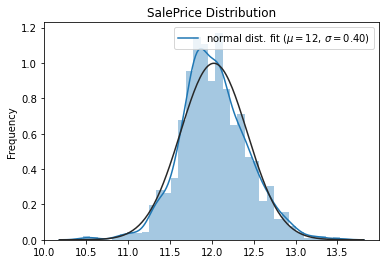

In [2995]:
# Use log1p to fix the skewness
y_train = np.log1p(y_train)

# Examine the new distribution
sns.distplot(y_train, fit = norm)

# Get the fitted paramates used by sns
(mu, sigma) = norm.fit(y_train)
print("mu = {:.2f} and sigma = {:.2f}\n".format(mu, sigma))

# Plot the distribution
plt.legend(["normal dist. fit ($\mu = ${0:.2g}, $\sigma = ${1:.2f})".format(mu, sigma)])
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

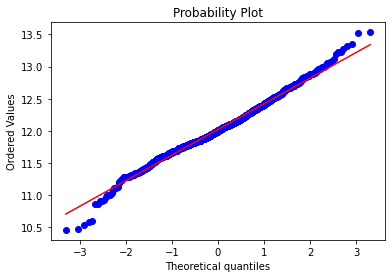

In [2996]:
# Check QQ-plot
res = stats.probplot(y_train, plot = plt)

In [2997]:
# Get the processed train and test datasets
# Remember that there are 2 houses removed before (identified as outliers)
X_train = combined_data[:1458]
X_test = combined_data[1458:]

In [2998]:
X_train.shape

(1458, 228)

In [2999]:
X_test.shape

(1459, 228)

## Modelling

In [3000]:
# Define a cross validation strategy
n_folds = 10
kfolds = KFold(n_splits = n_folds, shuffle = True, random_state = 0)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X = X_train):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kfolds))
    return (rmse)

### Base Models

In [3001]:
alphas_ridge = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas_lasso = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_elasticnet = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
l_ratio_alpha_elasticnet = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

ridge = make_pipeline(RobustScaler(), RidgeCV(alphas = alphas_ridge,
                                              cv = kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter = 1e7,
                                              alphas = alphas_lasso,
                                              random_state = 0,
                                              cv = kfolds))
elasticnet = make_pipeline(RobustScaler(),  ElasticNetCV(max_iter = 1e7,
                                                         alphas = alphas_elasticnet,
                                                         cv = kfolds,
                                                         l1_ratio = l_ratio_alpha_elasticnet))
svr = make_pipeline(RobustScaler(), SVR(C = 20,
                                        epsilon = 0.008,
                                        gamma = 0.0003))

gbr = GradientBoostingRegressor(n_estimators = 3000,
                                learning_rate = 0.05,
                                max_depth = 4,
                                max_features = 'sqrt',
                                min_samples_leaf = 15,
                                min_samples_split = 10,
                                loss = 'huber',
                                random_state = 42)
            
lightgbm = LGBMRegressor(objective = 'regression',
                         num_leaves = 4,
                         learning_rate = 0.01,
                         n_estimators = 5000,
                         max_bin = 200,
                         bagging_fraction = 0.75,
                         bagging_freq = 5,
                         bagging_seed = 7,
                         feature_fraction = 0.2,
                         feature_fraction_seed = 7,
                         verbose = -1)

xgboost = XGBRegressor(learning_rate = 0.01,
                       n_estimators = 3460,
                       max_depth = 3,
                       min_child_weight = 0,
                       gamma = 0, subsample = 0.7,
                       colsample_bytree = 0.7,
                       objective = 'reg:linear',
                       nthread = -1,
                       scale_pos_weight = 1,
                       seed = 27,
                       reg_alpha = 0.00006)

In [3002]:
stack_gen = StackingCVRegressor(regressors = (
                                    ridge, lasso, elasticnet, svr, gbr, lightgbm, xgboost),
                                meta_regressor = xgboost,
                                use_features_in_secondary = True)

In [3004]:
score = cv_rmse(ridge)
print("Ridge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(lasso)
print("Lasso: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(elasticnet)
print("Elastic net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(lightgbm)
print("Lightgbm: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(gbr)
print("Gbr: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(xgboost)
print("Xgboost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Ridge: 0.1123 (0.0119)

Lasso: 0.1126 (0.0123)

Elastic net: 0.1127 (0.0122)

SVR: 0.1620 (0.0169)

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Cu

In [3005]:
print('START Fit')

print('stack_gen')
stack_gen_model = stack_gen.fit(X_train, y_train)

print('elasticnet')
elastic_model_full_data = elasticnet.fit(X_train, y_train)

print('Lasso')
lasso_model_full_data = lasso.fit(X_train, y_train)

print('Ridge')
ridge_model_full_data = ridge.fit(X_train, y_train)

print('Svr')
svr_model_full_data = svr.fit(X_train, y_train)

print('GradientBoosting')
gbr_model_full_data = gbr.fit(X_train, y_train)

print('lightgbm')
lgb_model_full_data = lightgbm.fit(X_train, y_train)

print('xgboost')
xgb_model_full_data = xgboost.fit(X_train, y_train)

START Fit
stack_gen
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0

In [3006]:
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.05 * lasso_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.3 * stack_gen_model.predict(np.array(X))))

#     return ((0.05 * elastic_model_full_data.predict(X)) + \
#             (0.05 * lasso_model_full_data.predict(X)) + \
#             (0.1 * ridge_model_full_data.predict(X)) + \
#             (0.05 * svr_model_full_data.predict(X)) + \
#             (0.05 * gbr_model_full_data.predict(X)) + \
#             (0.1 * xgb_model_full_data.predict(X)) + \
#             (0.1 * lgb_model_full_data.predict(X)) + \
#             (0.5 * stack_gen_model.predict(np.array(X))))

In [3007]:
print('RMSLE score on train data:')
print(rmsle(y_train, blend_models_predict(X_train)))

RMSLE score on train data:
0.06275701011766849


In [3008]:
y_pred_log = blend_models_predict(X_test)
y_pred = np.expm1(y_pred_log)

In [3009]:
# Create the submission file
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('sample_submission.csv')
submission = pd.concat([sub_df['Id'], pred], axis = 1)
submission.columns = ['Id', 'SalePrice']
submission.to_csv('my_submission.csv', index = False)